In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s "High-fidelity Fraudulent Activity Dataset 2023"

ref                                                          title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
zeesolver/credit-card                                        High-fidelity Fraudulent Activity Dataset 2023  143MB  2023-10-05 16:50:57            387         24  1.0              
willianoliveiragibin/high-fidelity-fraudulent-activity-2023  High-fidelity Fraudulent Activity 2023          143MB  2023-10-15 19:16:57             10          1  1.0              


In [ ]:
!kaggle datasets download -d zeesolver/credit-card

 99% 141M/143M [00:06<00:00, 23.8MB/s]
100% 143M/143M [00:06<00:00, 24.8MB/s]


In [ ]:
file_ref = zipfile.ZipFile("/content/credit-card.zip", "r")
file_ref.extractall('/content/sample_data')
file_ref.close()

In [ ]:
df = pd.read_csv("/content/sample_data/creditcard_2023.csv" , index_col="id")
df.sample(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
152519,1.678062,-0.607354,0.558046,-0.456632,-0.017221,0.503587,0.127589,-0.133221,2.363592,0.503759,...,-0.134377,0.099516,0.253652,-0.609330,-1.023519,0.951062,-0.284995,-0.234480,23420.53,0
406689,0.974377,0.457733,-0.804022,1.057933,1.131890,-0.618767,0.159057,-0.086735,-0.904725,-0.472940,...,-0.052204,-0.748948,-0.099972,0.008251,0.544970,0.160491,0.371171,0.685963,8128.51,1
391885,-0.157745,-0.074385,0.402841,-0.238308,0.618056,0.180908,0.233887,-0.594322,0.518106,0.494249,...,0.613676,-0.772296,-0.182718,-0.593918,-0.098250,0.658041,0.310801,0.182176,18701.54,1
434769,-0.909496,-0.440602,-0.459261,0.933494,-1.389496,2.270415,0.833941,-0.244746,-0.728040,-0.503273,...,-0.044876,1.039556,-1.482569,0.100280,-0.775334,0.737697,1.946075,-2.504050,2363.88,1
489522,-0.420424,-0.270981,0.025737,-0.251105,0.002584,0.314336,0.105320,-0.121654,0.623602,-0.080162,...,-0.055671,-0.120760,-0.234155,-1.091887,0.180359,0.964629,-1.177516,1.102824,23055.54,1
433752,0.654734,0.336172,-0.648687,1.141435,0.110616,-0.675243,-0.207295,-0.038543,-0.843171,-0.486231,...,0.043295,-0.697604,0.062196,-0.497826,0.266863,-0.131994,0.754901,0.825454,12379.58,1
392606,-1.509355,1.362476,-1.711973,1.304601,-1.708063,-2.514421,-1.964205,0.667594,-1.390543,-2.121066,...,0.313970,1.089163,-0.374093,1.196558,-1.766057,-1.054582,-1.137982,-0.431351,1827.24,1
327607,1.025956,0.325226,-0.683389,1.018780,0.844138,-0.376212,0.133311,-0.111340,-0.716625,-0.310721,...,-0.015753,-0.391715,-0.159803,-0.094332,0.869986,0.417321,0.351519,0.569210,744.80,1
433579,-0.268456,0.154061,0.037983,0.302713,0.314867,-0.020380,0.109807,0.002630,-0.212913,-0.274673,...,-0.027902,-0.253614,-0.083156,-0.631997,0.200425,-0.084626,-0.142881,-0.169303,11887.82,1


In [ ]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

array([[<Axes: title={'center': 'V1'}>, <Axes: title={'center': 'V2'}>,
        <Axes: title={'center': 'V3'}>, <Axes: title={'center': 'V4'}>,
        <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>],
       [<Axes: title={'center': 'V11'}>, <Axes: title={'center': 'V12'}>,
        <Axes: title={'center': 'V13'}>, <Axes: title={'center': 'V14'}>,
        <Axes: title={'center': 'V15'}>],
       [<Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>,
        <Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>],
       [<Axes: title={'center': 'V21'}>, <Axes: title={'center': 'V22'}>,
        <Axes: title={'center': 'V23'}>, <Axes: title={'center': 'V24'}>,
        <Axes: title={'center': 'V25'}>],
       [<Axes: title={'center': 'V26'}>, <Axes: title={'cen

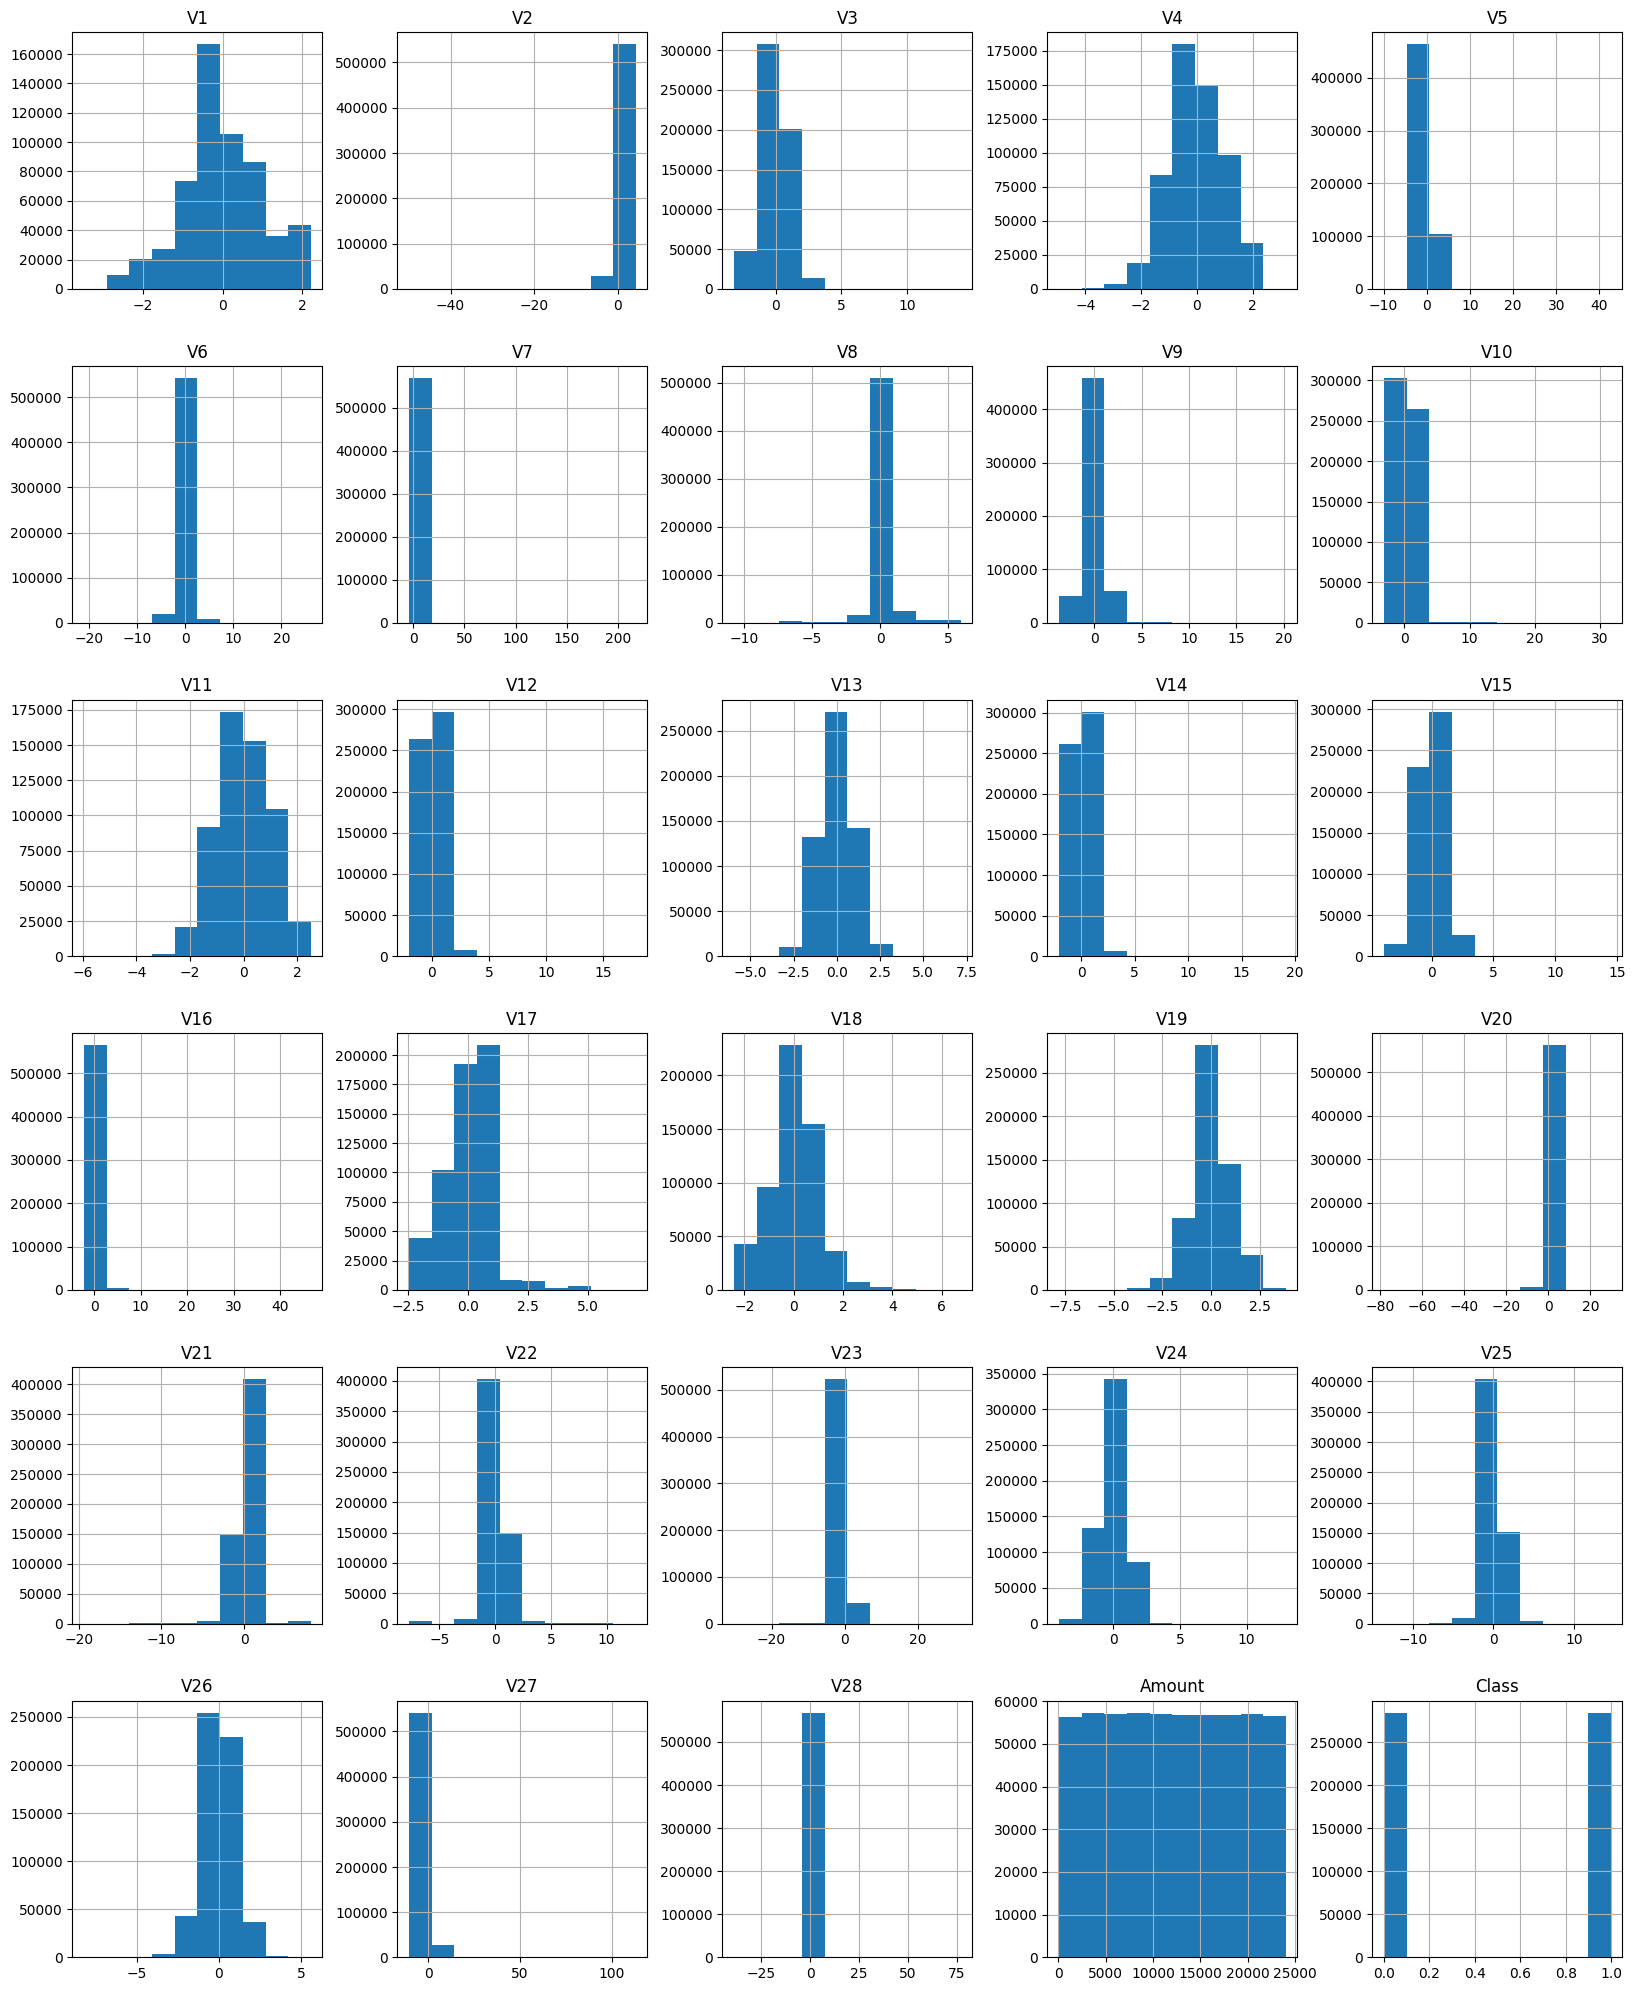

In [ ]:
df.hist(figsize=(20,25))

IndexError: ignored

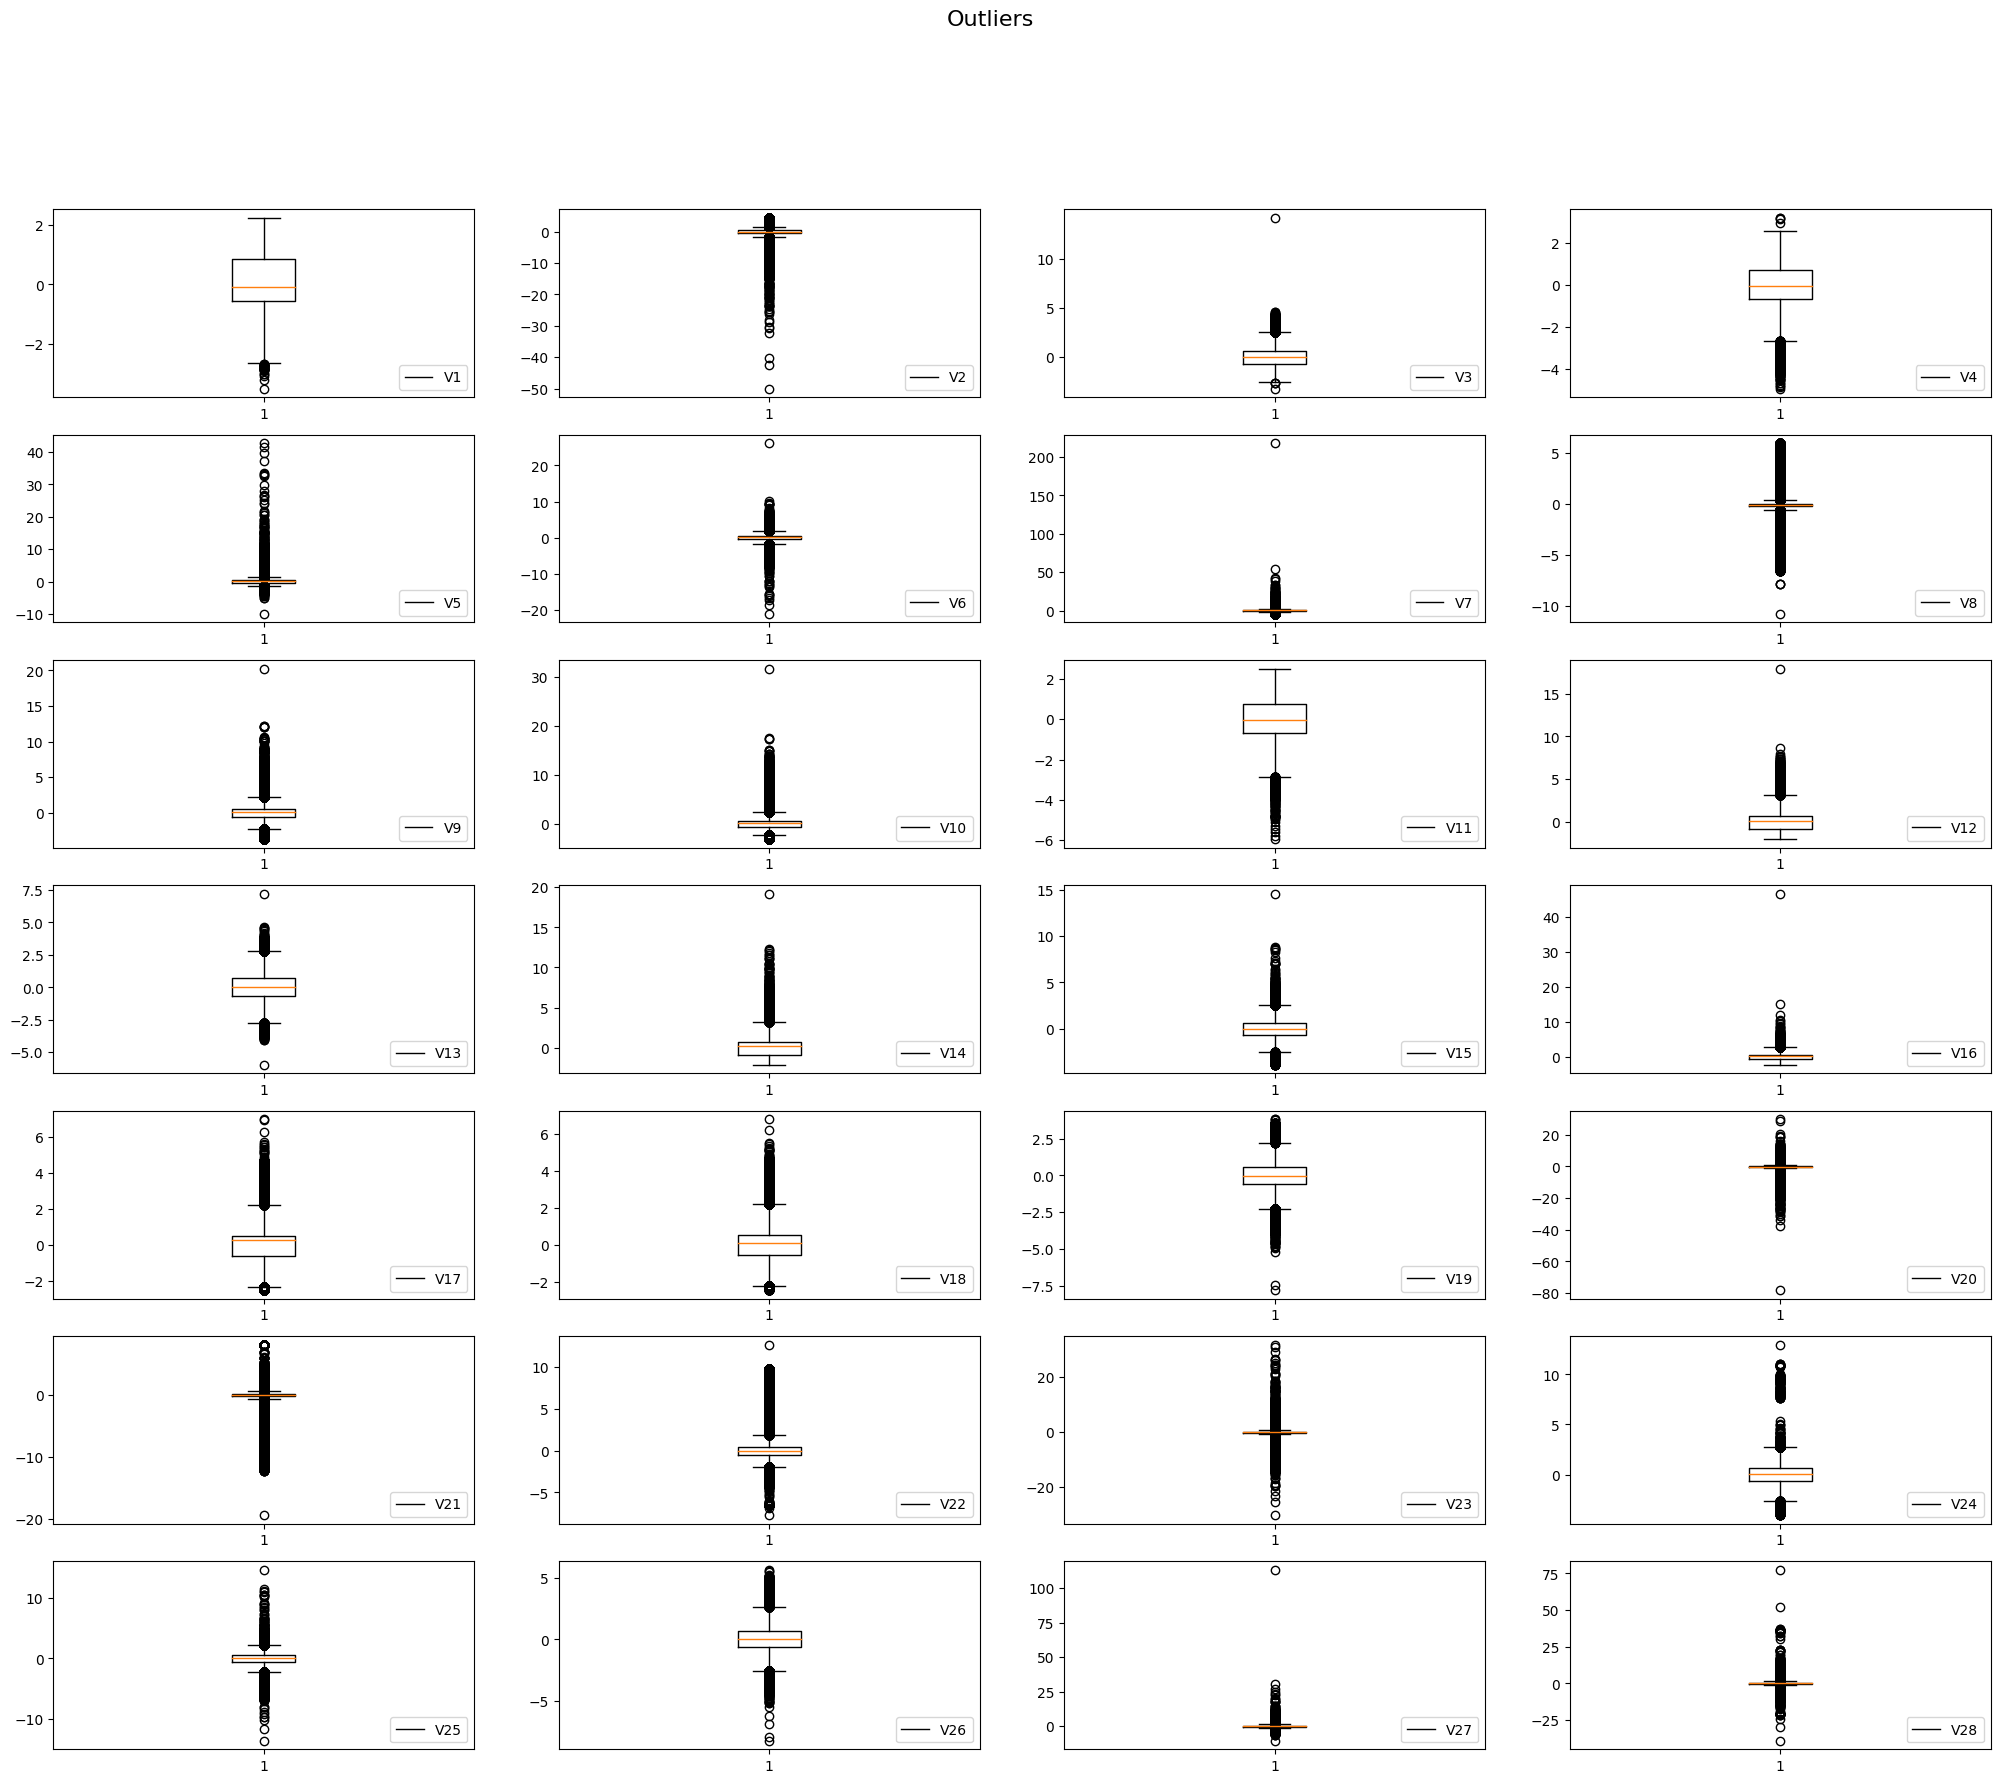

In [ ]:
fig, ax = plt.subplots(7, 4, figsize=(25, 20))
fig.suptitle("Outliers", fontsize=16)

kolom, baris = 0,0

for y in df.columns:
    ax[kolom, baris].boxplot(df[y])
    ax[kolom, baris].legend([f'{y}'], loc='lower right')
    baris += 1

    if (baris % 4 == 0):
        kolom += 1
        baris = 0

plt.show()

In [ ]:
scaler = RobustScaler()
dfScaled = scaler.fit_transform(np.array(df.iloc[:,:-1]).reshape(-1,1)).reshape(df.iloc[:,:-1].shape)


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>,
        <Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
        <Axes: title={'center': '9'}>],
       [<Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>,
        <Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>],
       [<Axes: title={'center': '15'}>, <Axes: title={'center': '16'}>,
        <Axes: title={'center': '17'}>, <Axes: title={'center': '18'}>,
        <Axes: title={'center': '19'}>],
       [<Axes: title={'center': '20'}>, <Axes: title={'center': '21'}>,
        <Axes: title={'center': '22'}>, <Axes: title={'center': '23'}>,
        <Axes: title={'center': '24'}>],
       [<Axes: title={'center': '25'}>, <Axes: title={'center': '26'}>,
        <Axes

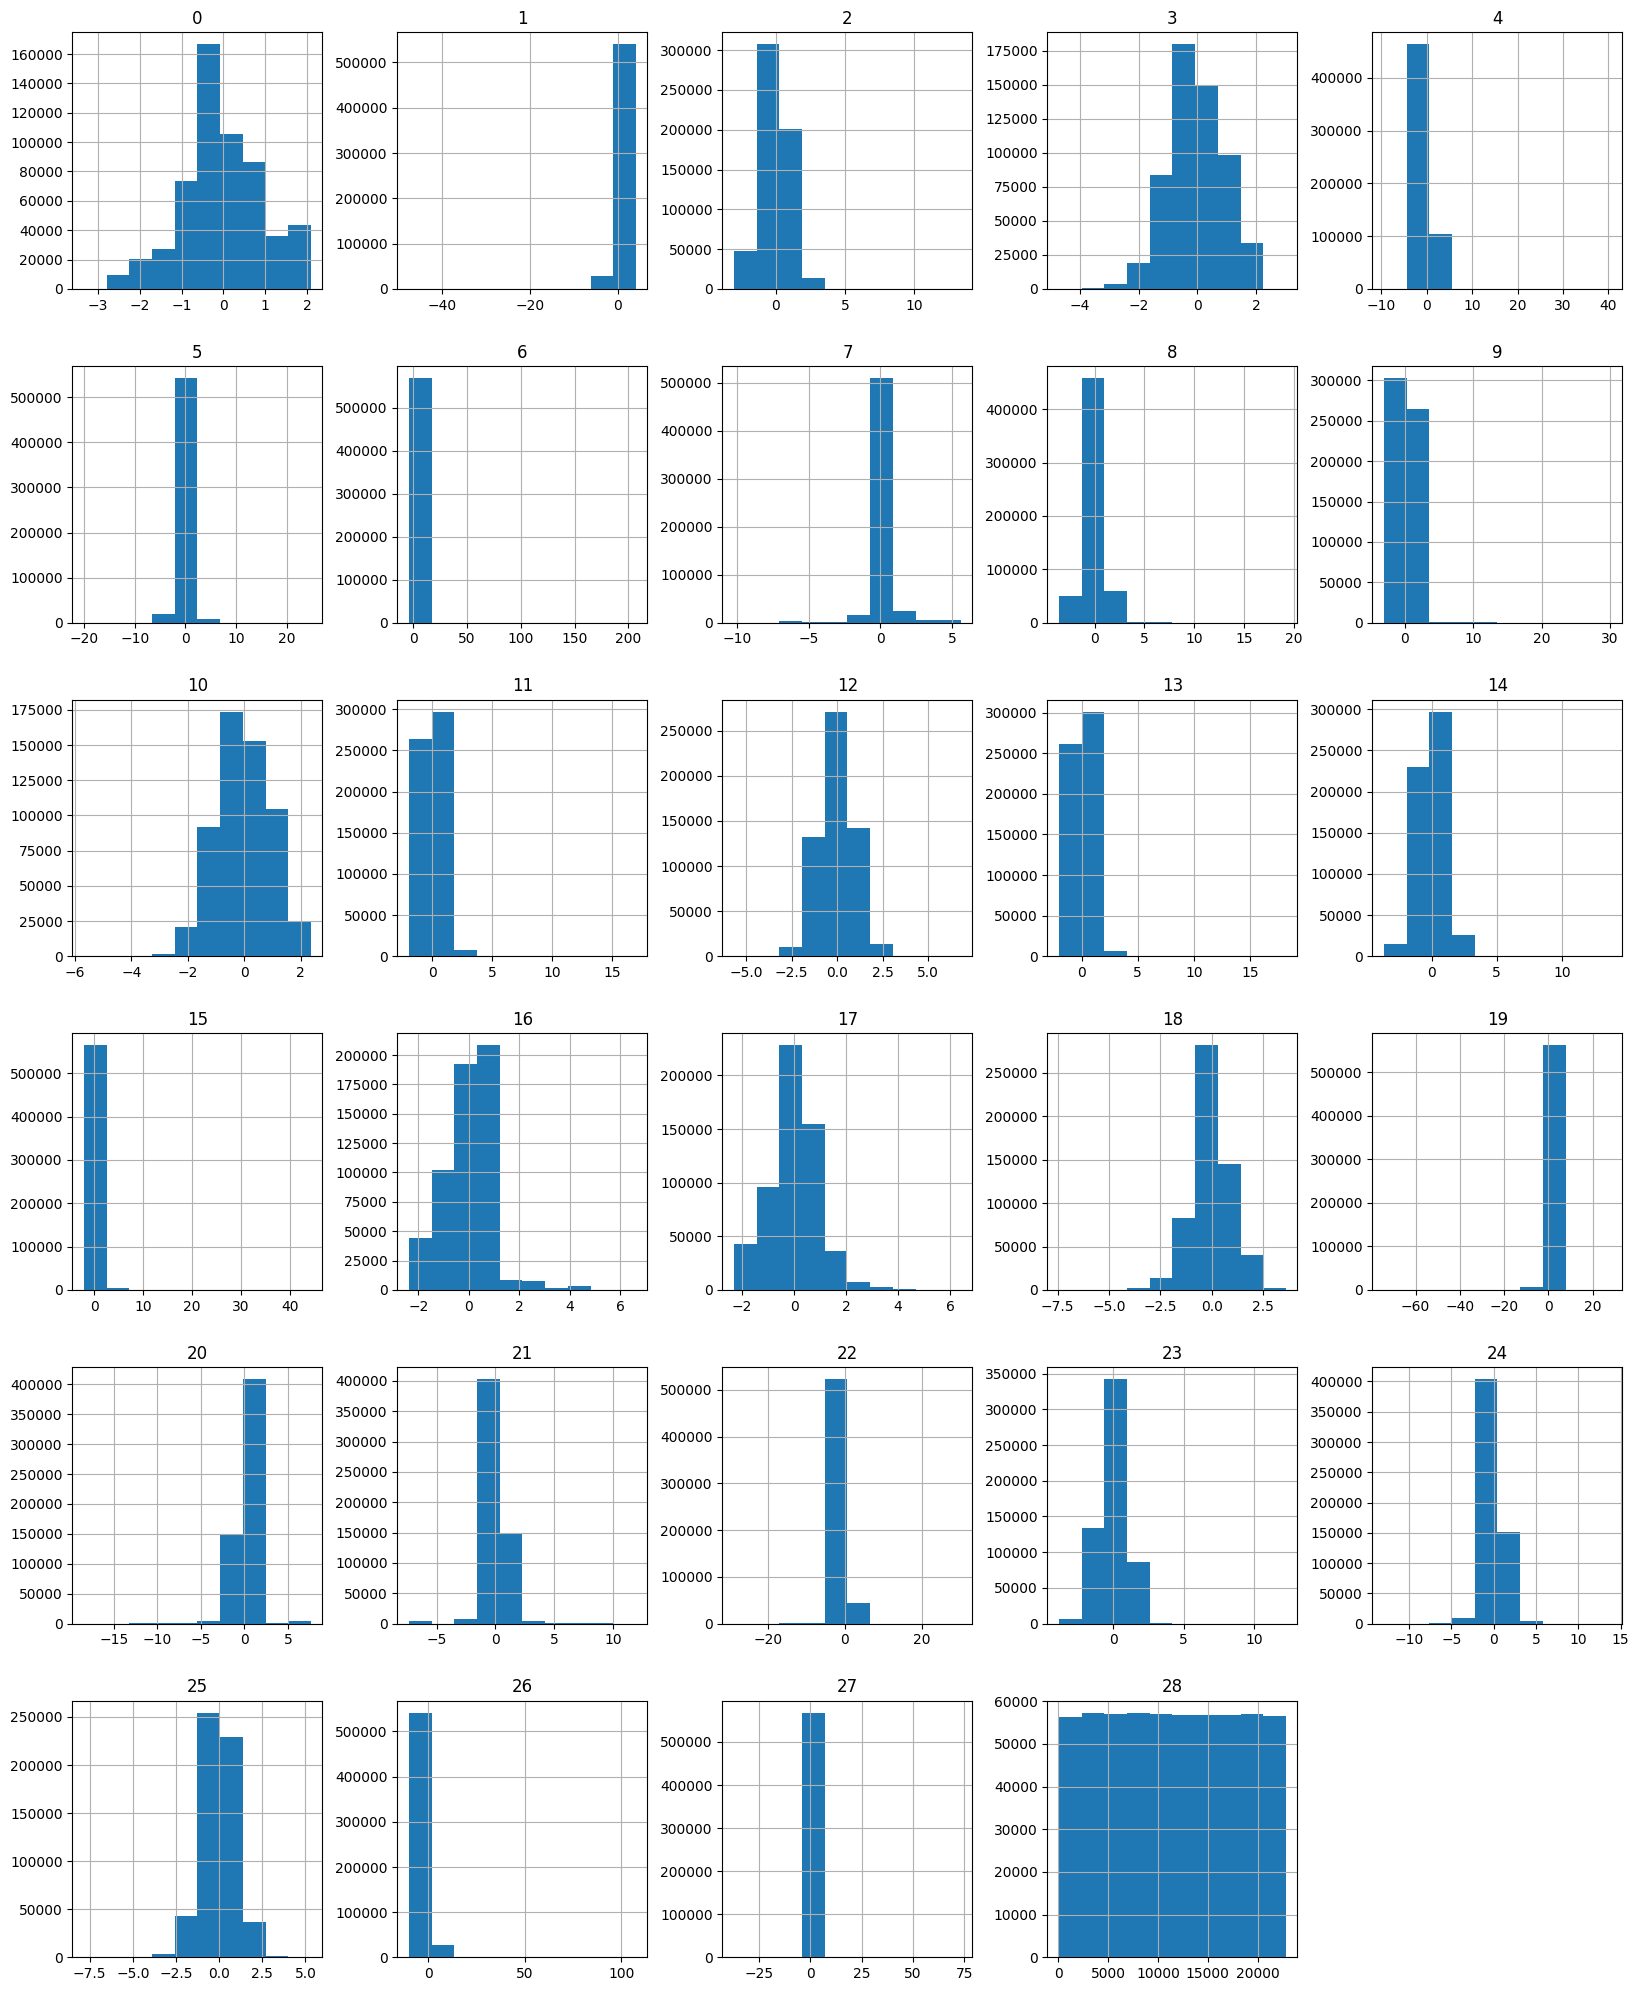

In [ ]:
dfScaled = pd.DataFrame(dfScaled)
dfScaled.hist(figsize=(20,25))

<Axes: >

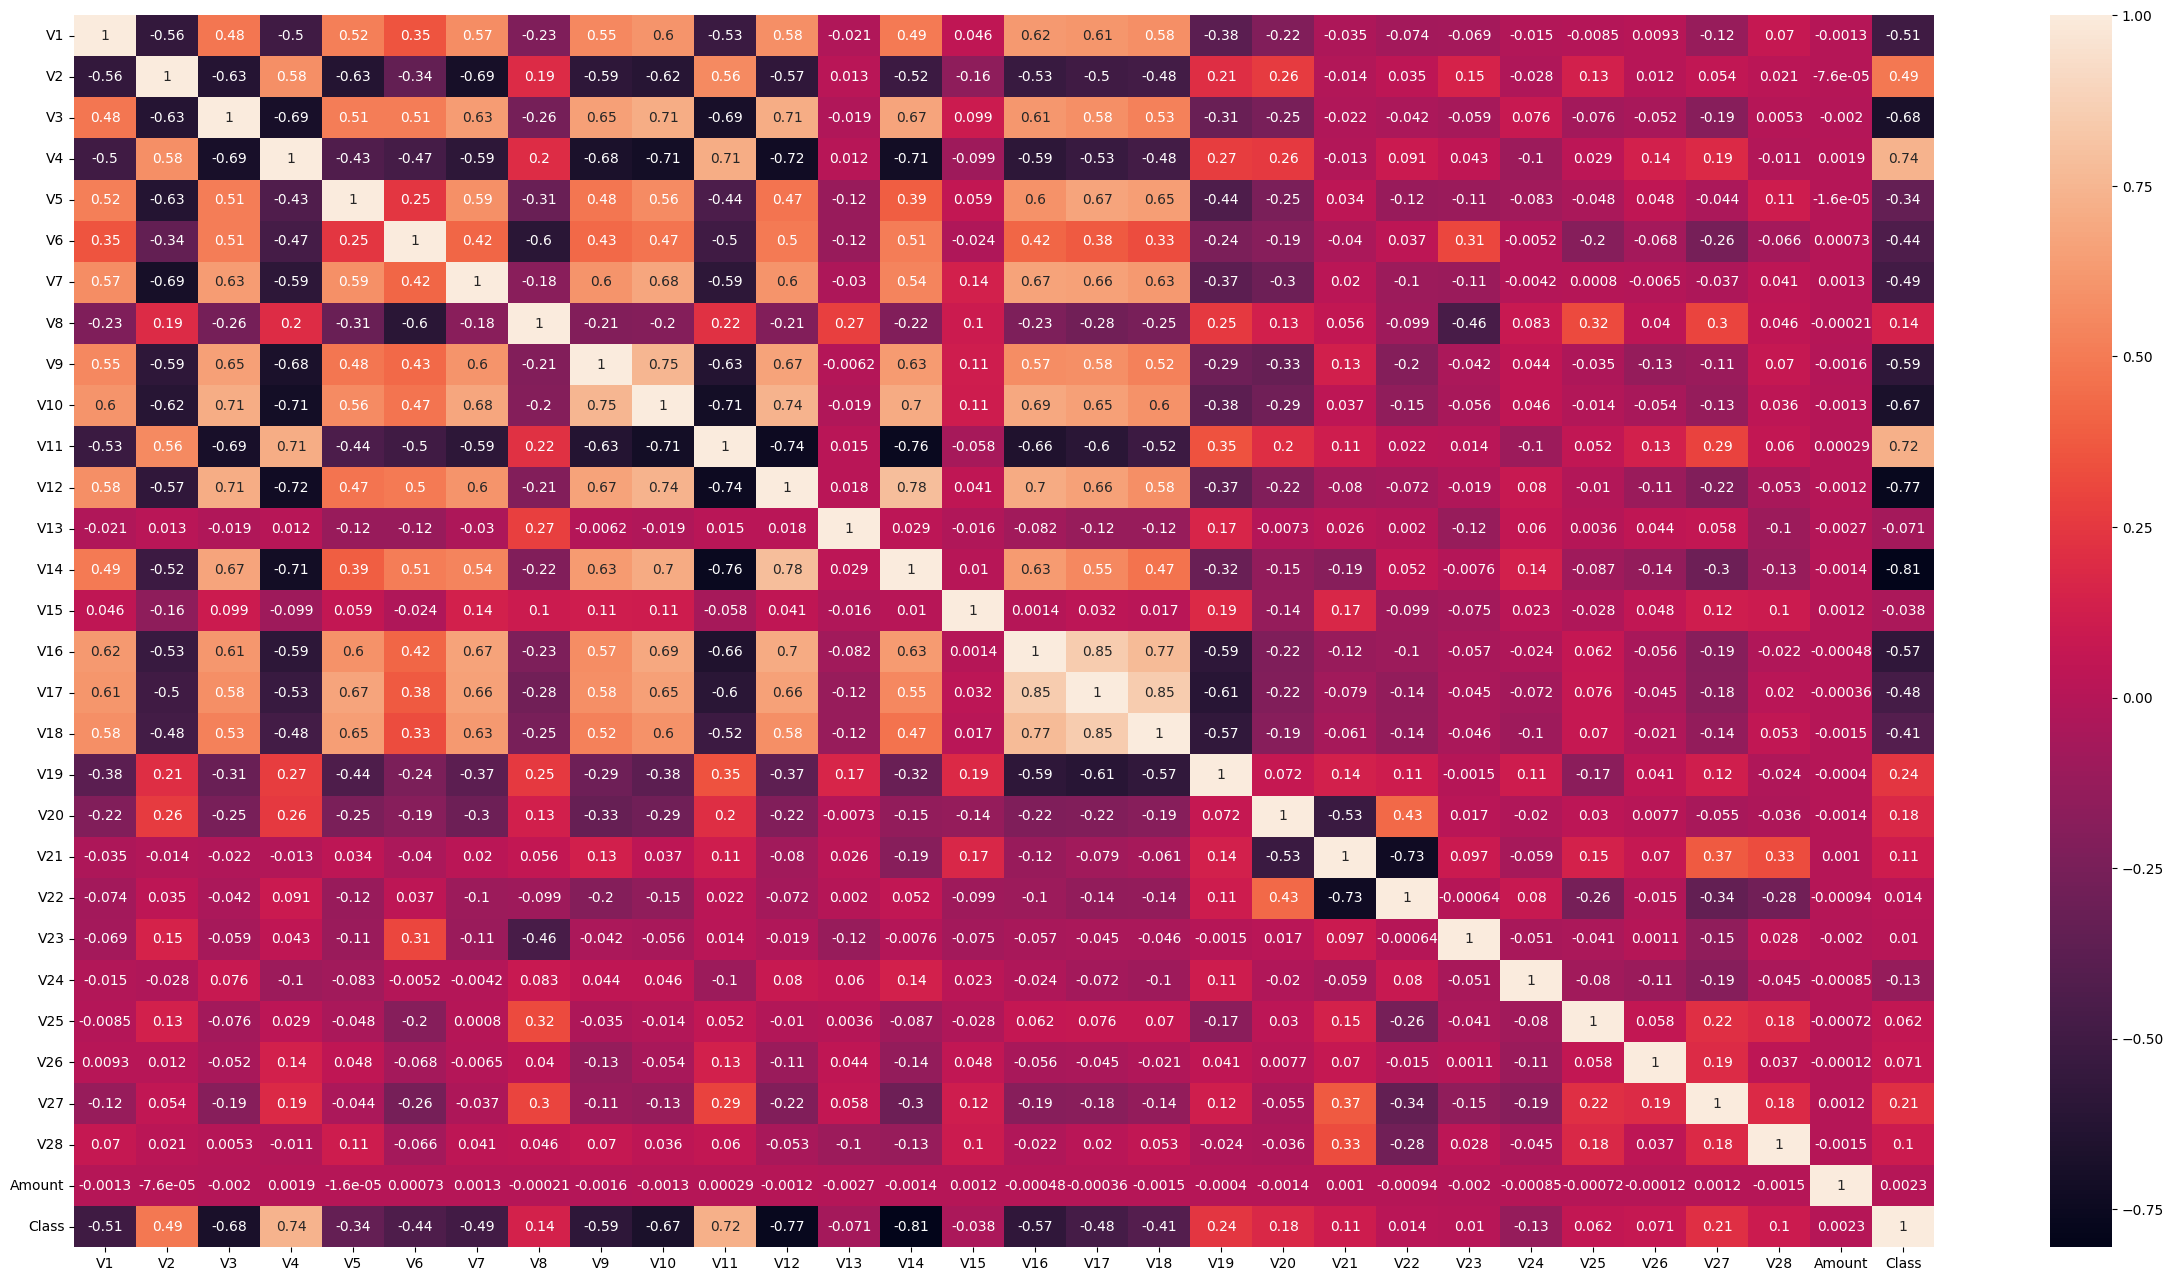

In [ ]:
plt.figure(figsize=(30,16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

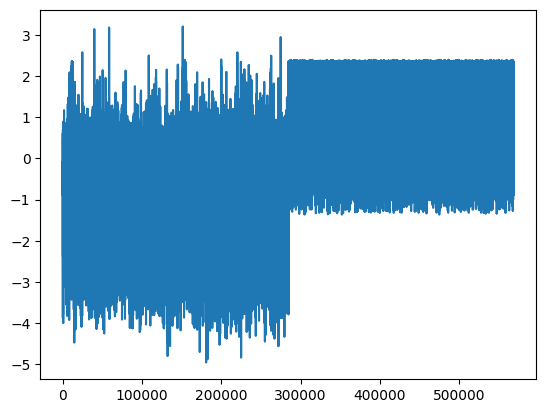

In [ ]:
plt.plot(df["V4"])

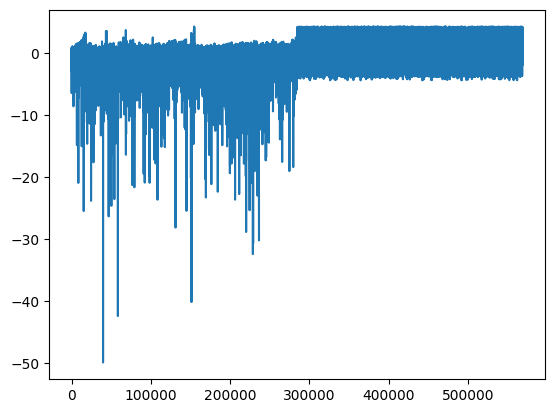

In [ ]:
plt.plot(df["V2"])

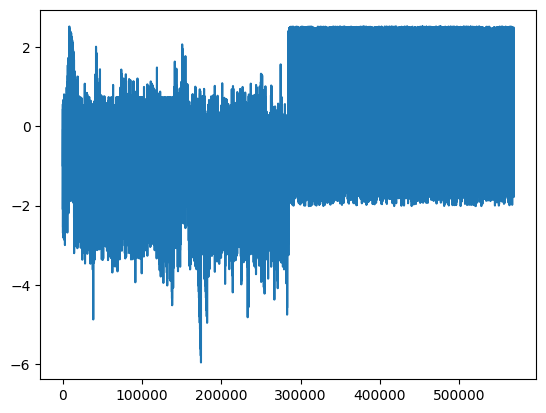

In [ ]:
plt.plot(df["V11"])

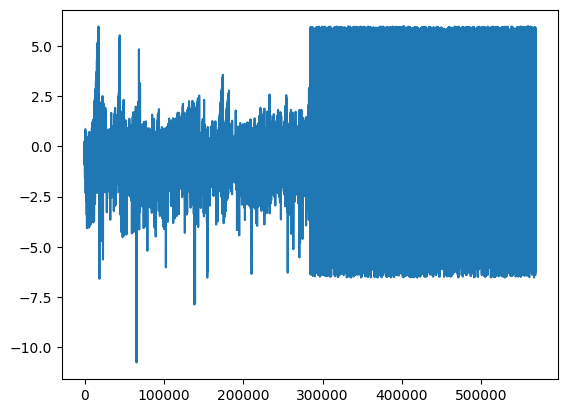

In [ ]:
plt.plot(df["V8"])

In [ ]:
X_scl = dfScaled
y_scl = df['Class']

In [ ]:
X_train_scl, X_test_scl, y_train_scl, y_test_scl = train_test_split(X_scl, y_scl, random_state=42, test_size=0.2)

In [ ]:
models = {
    "Tree" : DecisionTreeClassifier(random_state=42),
    "NB" : GaussianNB(),
    "KNN" : KNeighborsClassifier(),
    "RF" : RandomForestClassifier(random_state=42),
    "SVM" : SVC(random_state=42),
    "XGB": XGBClassifier()
}

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
main_score = []

for nama, model in models.items():
    score = cross_val_score(model, X_train_scl , y_train_scl, cv=kfold, scoring='accuracy')
    main_score.append(score)
    print(f"{nama} -- {score} dengan score rata-rate {score.mean()}")

Tree -- [0.99795564 0.99804357 0.99773582 0.99753797 0.99788965 0.99795559
 0.99802154 0.9976918  0.99720818 0.99753792] dengan score rata-rate 0.9977577681402527
NB -- [0.91626915 0.91840144 0.91706052 0.91618122 0.91637723 0.9158936
 0.91705869 0.91499231 0.91721257 0.916663  ] dengan score rata-rate 0.9166109740331185
KNN -- [0.93482227 0.93607527 0.93497615 0.93486624 0.93585403 0.93462299
 0.93638162 0.93255661 0.9365355  0.93479886] dengan score rata-rate 0.935148954187895
RF -- [0.99980216 0.99991207 0.99982414 0.99993405 0.99984612 0.99989009
 0.99978017 0.9998681  0.99991207 0.99984612] dengan score rata-rate 0.9998615091835059
